<a href="https://colab.research.google.com/github/SeungbeomDo/Time_Series_Analysis/blob/main/ARCH_GARCH_Return_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 및 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/kospi_data.csv', encoding = 'cp949')
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = [x.year for x in data['Date']]

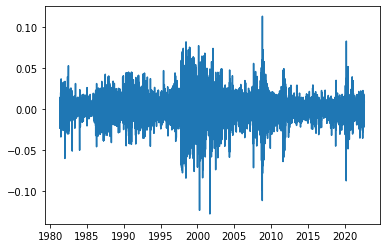

In [ ]:
data['Return'] = np.log(data['Close']/data['Close'].shift(1))
plt.plot(data['Date'], data['Return'])

#수익률 분포의 fat-tailness

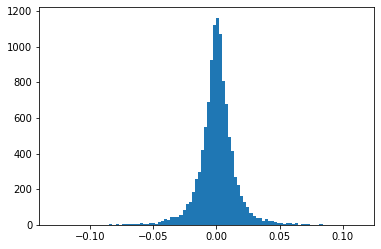

In [ ]:
plt.hist(data['Return'], bins = 100)
plt.show()

Text(0, 0.5, 'KOSPI daily return')

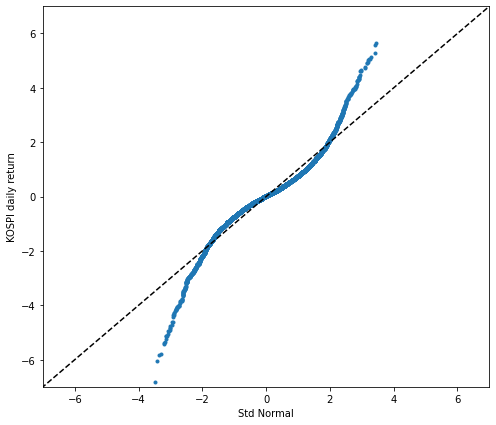

In [ ]:
plt.figure(figsize = (8,7))
plt.plot(np.sort(list(np.random.randn(len(data)))), (data['Return'].sort_values() - data['Return'].mean())/np.std(data['Return']), '.')
plt.plot(np.arange(-8, 8), np.arange(-8, 8), linestyle = '--', color = 'black')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.xlabel('Std Normal')
plt.ylabel('KOSPI daily return')

#오차제곱(수익률제곱)의 ACF, PACF

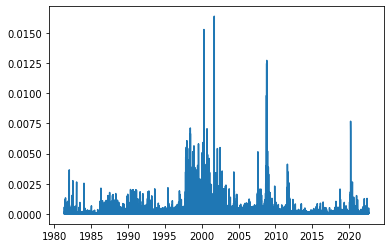

count    11023.000000
mean         0.000212
std          0.000589
min          0.000000
25%          0.000008
50%          0.000045
75%          0.000172
max          0.016396
Name: Return2, dtype: float64


In [ ]:
data['Return2'] = data['Return']**2
plt.plot(data['Date'], data['Return2'])
plt.show()

print(data['Return2'].describe())
data = data.dropna()

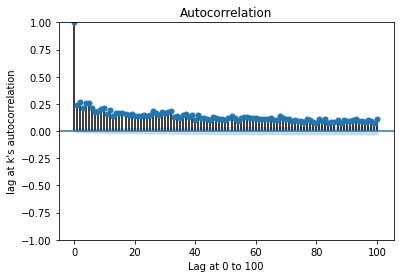

In [ ]:
def acf_plot(data, N_LAGS, alpha):
    from statsmodels.graphics.tsaplots import plot_acf
    
    fig = plot_acf(data, lags=N_LAGS, alpha=alpha)
    plt.xlabel(f'Lag at 0 to {N_LAGS}')
    plt.ylabel("lag at k's autocorrelation")
    plt.show()
    
acf_plot(data['Return2'], 100, 0.05)

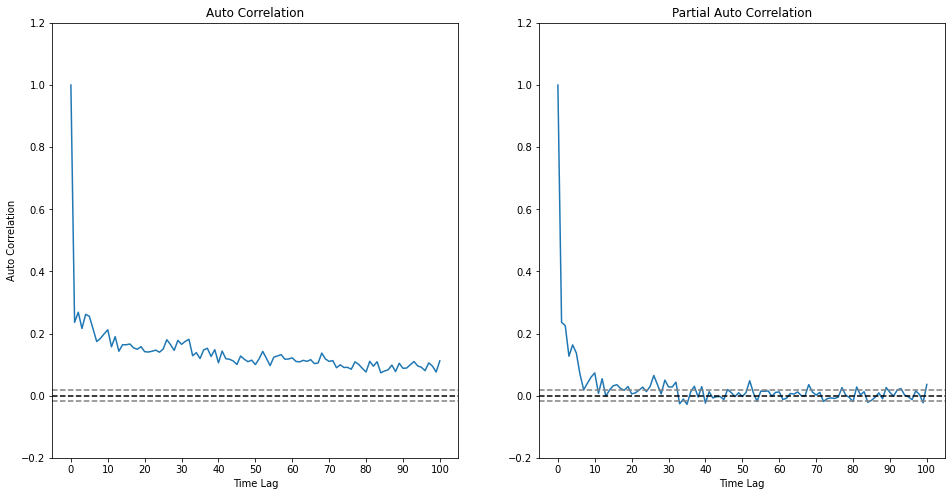

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
lag_acf = acf(data['Return2'], nlags=100)
plt.plot(np.arange(101), lag_acf)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data['Return2'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Return2'])),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('Time Lag')
plt.ylabel('Auto Correlation')

plt.subplot(1,2,2)
lag_pacf = pacf(data['Return2'], nlags=100, method='ols')
plt.plot(np.arange(101), lag_pacf)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data['Return2'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Return2'])),linestyle='--',color='gray')
plt.title('Partial Auto Correlation')
plt.xlabel('Time Lag')

plt.show()

#ARMA - GARCH model

In [ ]:
data_train = data[data['Year']<2018]
data_test = data[data['Year']>=2018]

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

!pip install --user pmdarima

import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = pm.auto_arima(y = data_train['Return']       # 데이터
                      , d = 0           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-60969.505, Time=2.94 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-61029.009, Time=0.74 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-61032.368, Time=1.75 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-61037.070, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-61034.975, Time=1.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-61034.139, Time=0.97 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-61036.626, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-61035.664, Time=1.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-61032.228, Time=10.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-61038.980, Time=7.64 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-61034.139, Time=3.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-61030.770, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-61036.942, Time=9.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-61036.077, Time=11.38 sec
 AR

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_return = ARIMA(data_train['Return'], order=(1,0,1), trend = 'c')
model_return_fit = model_return.fit()
model_return_fit.summary()

/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                 9873
Model:                 ARIMA(1, 0, 1)   Log Likelihood               27599.221
Date:                Sat, 11 Feb 2023   AIC                         -55190.443
Time:                        12:50:02   BIC                         -55161.652
Sample:                             0   HQIC                        -55180.691
                               - 9873                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.905      0.057   -8.73e-06       0.001
ar.L1         -0.3766      0.059     -6.409      0.000      -0.492      -0.261
ma.L1          0.4610      0.057      8.152      0.000       0.350       0.572
sigma2         0.0002   1.62e-06    134.848      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12245.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
data_train['Return_estimated'] = model_return_fit.predict()

<ipython-input-99-5dcf13276892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Return_estimated'] = model_return_fit.predict()


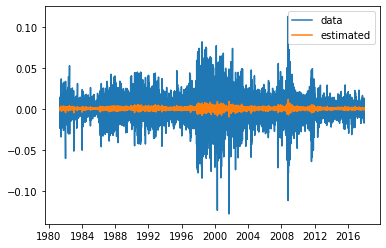

In [ ]:
plt.plot(data_train['Date'], data_train['Return'], label = 'data')
plt.plot(data_train['Date'], data_train['Return_estimated'], label = 'estimated')
plt.legend()
plt.show()

In [ ]:
data_train['Residual'] = data_train['Return'] - data_train['Return_estimated']

<ipython-input-101-67373a552743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Residual'] = data_train['Return'] - data_train['Return_estimated']


In [ ]:
data_train['Residual2'] = data_train['Residual']**2
data_train

<ipython-input-102-119dec5cba8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Residual2'] = data_train['Residual']**2


,Date,Close,Open,High,Low,Volume,Change,Year,Return,Return2,Return_estimated,Residual,Residual2
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,1981,-0.000809,6.551105e-07,0.000303,-0.001113,0.000001
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,1981,-0.023762,5.646266e-04,0.000214,-0.023975,0.000575
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,1981,0.000829,6.869821e-07,-0.001667,0.002496,0.000006
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,1981,-0.011667,1.361142e-04,0.001255,-0.012922,0.000167
5,1981-05-08,118.70,118.70,118.70,118.70,1090000.0,-0.0050,1981,-0.005042,2.542204e-05,-0.001145,-0.003897,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869,2017-12-21,2429.83,2471.34,2471.73,2429.83,247330000.0,-0.0172,2017,-0.017356,3.012276e-04,0.000049,-0.017405,0.000303
9870,2017-12-22,2440.54,2437.59,2444.57,2426.94,230410000.0,0.0044,2017,0.004398,1.934267e-05,-0.001070,0.005468,0.000030
9871,2017-12-26,2427.34,2447.67,2457.19,2427.34,224640000.0,-0.0054,2017,-0.005423,2.941239e-05,0.001282,-0.006705,0.000045
9872,2017-12-27,2436.67,2420.86,2436.68,2411.48,194850000.0,0.0038,2017,0.003836,1.471755e-05,-0.000631,0.004467,0.000020


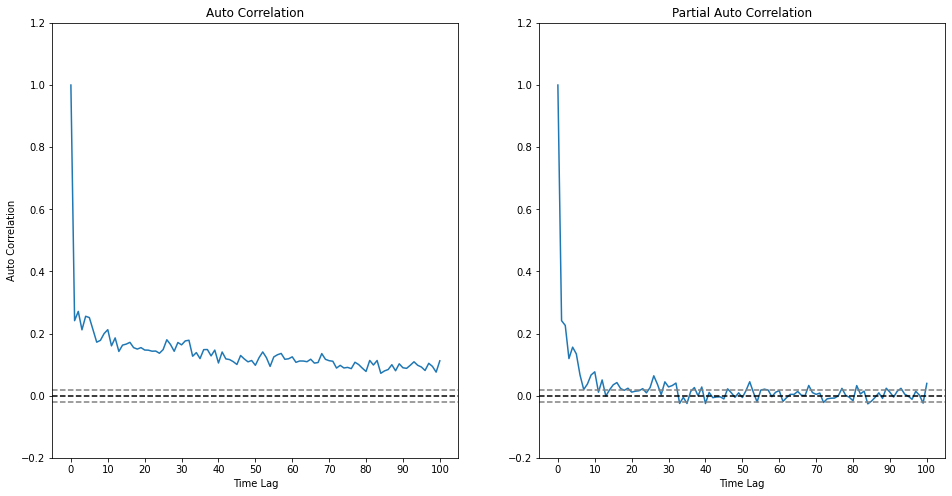

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
lag_acf = acf(data_train['Residual2'], nlags=100)
plt.plot(np.arange(101), lag_acf)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data_train['Residual2'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_train['Residual2'])),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('Time Lag')
plt.ylabel('Auto Correlation')

plt.subplot(1,2,2)
lag_pacf = pacf(data_train['Residual2'], nlags=100, method='ols')
plt.plot(np.arange(101), lag_pacf)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data_train['Residual2'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_train['Residual2'])),linestyle='--',color='gray')
plt.title('Partial Auto Correlation')
plt.xlabel('Time Lag')

plt.show()

In [ ]:
model_vol = pm.auto_arima(y = data_train['Residual2']       # 데이터
                      , d = 0           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 10       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 10       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-131535.051, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-132794.361, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-132325.358, Time=2.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-133674.272, Time=1.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-133938.206, Time=2.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-133909.068, Time=5.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-134374.104, Time=2.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-134654.043, Time=4.98 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-134768.620, Time=7.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-132944.408, Time=3.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-134774.069, Time=2.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-133190.164, Time=16.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-134852.648, Time=9.96 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-134852.058, Time

In [ ]:
model_vol = ARIMA(data_train['Residual2'], order=(10,0,10))
model_vol_fit = model_vol.fit()
model_vol_fit.summary()

/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Residual2   No. Observations:                10859
Model:               ARIMA(10, 0, 10)   Log Likelihood               66450.233
Date:                Sat, 11 Feb 2023   AIC                        -132856.466
Time:                        12:06:27   BIC                        -132696.025
Sample:                             0   HQIC                       -132802.379
                              - 10859                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   4.42e-05      4.792      0.000       0.000       0.000
ar.L1         -0.2514      0.002   -114.529      0.000      -0.256      -0.247
ar.L2         -0.0840      0.002    -36.844      0.000      -0.088      -0.079
ar.L3         -0.0424      0.002    -17.906      0.000      -0.047      -0.038
ar.L4          0.2578      0.002    160.967      0.000       0.255       0.261
ar.L5          0.1910      0.002    104.782      0.000       0.187       0.195
ar.L6          0.1670      0.002     68.242      0.000       0.162       0.172
ar.L7          0.3436      0.003    133.627      0.000       0.339       0.349
ar.L8          0.0574      0.003     22.691      0.000       0.052       0.062
ar.L9         -0.1549      0.003    -55.201      0.000      -0.160      -0.149
ar.L10         0.2962      0.003     93.353      0.000       0.290       0.302
ma.L1          0.3450      0.002    146.345      0.000       0.340       0.350
ma.L2          0.2493      0.002    103.380      0.000       0.245       0.254
ma.L3          0.1596      0.003     63.287      0.000       0.155       0.165
ma.L4         -0.0909      0.002    -39.309      0.000      -0.095      -0.086
ma.L5         -0.0330      0.003    -10.995      0.000      -0.039      -0.027
ma.L6         -0.0793      0.004    -22.056      0.000      -0.086      -0.072
ma.L7         -0.3184      0.005    -67.946      0.000      -0.328      -0.309
ma.L8         -0.0809      0.004    -18.194      0.000      -0.090      -0.072
ma.L9          0.1400      0.005     29.217      0.000       0.131       0.149
ma.L10        -0.2520      0.005    -49.775      0.000      -0.262      -0.242
sigma2      2.833e-07   6.24e-10    454.160      0.000    2.82e-07    2.85e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          13236816.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.33   Skew:                             8.88
Prob(H) (two-sided):                  0.00   Kurtosis:                       173.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.95e+18. Standard errors may be unstable.
"""

In [ ]:
model_vol = ARIMA(data_train['Residual2'], order=(3,0,3))
model_vol_fit = model_vol.fit()
model_vol_fit.summary()

/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Residual2   No. Observations:                 9873
Model:                 ARIMA(3, 0, 3)   Log Likelihood               60191.655
Date:                Sat, 11 Feb 2023   AIC                        -120367.310
Time:                        12:50:27   BIC                        -120309.729
Sample:                             0   HQIC                       -120347.807
                               - 9873                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   4.47e-05      4.884      0.000       0.000       0.000
ar.L1          0.5931      0.002    311.304      0.000       0.589       0.597
ar.L2         -0.0030      0.002     -1.282      0.200      -0.007       0.002
ar.L3          0.3674      0.002    196.392      0.000       0.364       0.371
ma.L1         -0.5110      0.002   -216.501      0.000      -0.516      -0.506
ma.L2          0.0946      0.003     34.605      0.000       0.089       0.100
ma.L3         -0.3817      0.003   -117.308      0.000      -0.388      -0.375
sigma2      2.961e-07   6.34e-10    467.210      0.000    2.95e-07    2.97e-07
===================================================================================
Ljung-Box (L1) (Q):                   2.18   Jarque-Bera (JB):          12467516.59
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                             9.06
Prob(H) (two-sided):                  0.00   Kurtosis:                       176.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.33e+16. Standard errors may be unstable.
"""

In [ ]:
data_train['vol_estimated'] = model_vol_fit.predict()
data_train

<ipython-input-104-d9d4c60d8f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['vol_estimated'] = model_vol_fit.predict()


,Date,Close,Open,High,Low,Volume,Change,Year,Return,Return2,Return_estimated,Residual,Residual2,vol_estimated
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,1981,-0.000809,6.551105e-07,0.000303,-0.001113,0.000001,0.000218
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,1981,-0.023762,5.646266e-04,0.000214,-0.023975,0.000575,0.000172
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,1981,0.000829,6.869821e-07,-0.001667,0.002496,0.000006,0.000230
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,1981,-0.011667,1.361142e-04,0.001255,-0.012922,0.000167,0.000235
5,1981-05-08,118.70,118.70,118.70,118.70,1090000.0,-0.0050,1981,-0.005042,2.542204e-05,-0.001145,-0.003897,0.000015,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869,2017-12-21,2429.83,2471.34,2471.73,2429.83,247330000.0,-0.0172,2017,-0.017356,3.012276e-04,0.000049,-0.017405,0.000303,0.000070
9870,2017-12-22,2440.54,2437.59,2444.57,2426.94,230410000.0,0.0044,2017,0.004398,1.934267e-05,-0.001070,0.005468,0.000030,0.000093
9871,2017-12-26,2427.34,2447.67,2457.19,2427.34,224640000.0,-0.0054,2017,-0.005423,2.941239e-05,0.001282,-0.006705,0.000045,0.000108
9872,2017-12-27,2436.67,2420.86,2436.68,2411.48,194850000.0,0.0038,2017,0.003836,1.471755e-05,-0.000631,0.004467,0.000020,0.000084


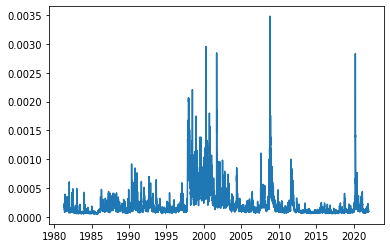

In [ ]:
plt.plot(data_train['Date'], data_train['vol_estimated'])

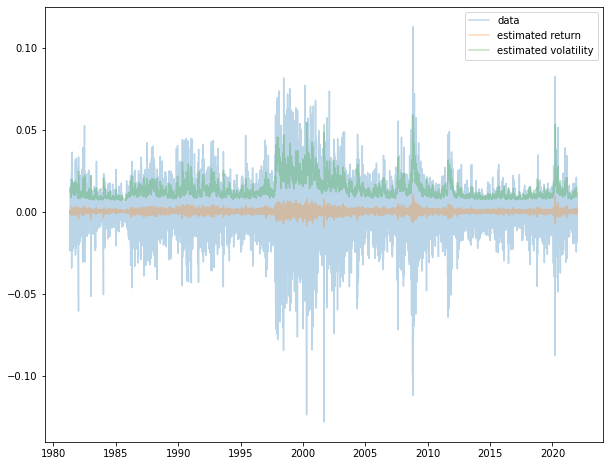

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(data_train['Date'], data_train['Return'], alpha = 0.3, label = 'data')
plt.plot(data_train['Date'], data_train['Return_estimated'], alpha = 0.3, label = 'estimated return')
plt.plot(data_train['Date'], data_train['vol_estimated']**(1/2), alpha = 0.3, label = 'estimated volatility')
plt.legend()
plt.show()

#Backtesting: 분산

In [ ]:
data_bt = data.copy().iloc[:, :10]
data_bt = data_bt.drop(columns = ['Open', 'High', 'Low', 'Volume'])
data_bt

,Date,Close,Change,Year,Return,Return2
1,1981-05-02,123.50,-0.0008,1981,-0.000809,6.551105e-07
2,1981-05-04,120.60,-0.0235,1981,-0.023762,5.646266e-04
3,1981-05-06,120.70,0.0008,1981,0.000829,6.869821e-07
4,1981-05-07,119.30,-0.0116,1981,-0.011667,1.361142e-04
5,1981-05-08,118.70,-0.0050,1981,-0.005042,2.542204e-05
...,...,...,...,...,...,...
11019,2022-08-25,2477.26,0.0122,2022,0.012106,1.465660e-04
11020,2022-08-26,2481.03,0.0015,2022,0.001521,2.312485e-06
11021,2022-08-29,2426.89,-0.0218,2022,-0.022063,4.867845e-04
11022,2022-08-30,2450.93,0.0099,2022,0.009857,9.715931e-05


In [ ]:
data_bt['Vol_estimated'] = model_vol_fit.predict()

data_bt['error'] = data_bt['Return2'] - data_bt['Vol_estimated']
data_bt['error_t-1'] = data_bt['error'].shift(1)
data_bt['error_t-2'] = data_bt['error'].shift(2)
data_bt['error_t-3'] = data_bt['error'].shift(3)
data_bt['Return2_t-1'] = data_bt['Return2'].shift(1)
data_bt['Return2_t-2'] = data_bt['Return2'].shift(2)
data_bt['Return2_t-3'] = data_bt['Return2'].shift(3)

p1,p2,p3,q1,q2,q3 = [0.4915, -0.0240, 0.4665, -0.3838, 0.1262, -0.4548]

for i in np.arange(len(data_train)-1, len(data_bt)):
  est_vol = p1 * list(data_bt['Return2_t-1'])[i] + p2 * list(data_bt['Return2_t-2'])[i] + p3 * list(data_bt['Return2_t-3'])[i] + q1 * list(data_bt['error_t-1'])[i] + q2 * list(data_bt['error_t-2'])[i] + q3 * list(data_bt['error_t-3'])[i]
  data_bt.iloc[i, 6] = est_vol

  data_bt['error'] = data_bt['Return2'] - data_bt['Vol_estimated']
  data_bt['error_t-1'] = data_bt['error'].shift(1)
  data_bt['error_t-2'] = data_bt['error'].shift(2)
  data_bt['error_t-3'] = data_bt['error'].shift(3)
  data_bt['Return2_t-1'] = data_bt['Return2'].shift(1)
  data_bt['Return2_t-2'] = data_bt['Return2'].shift(2)
  data_bt['Return2_t-3'] = data_bt['Return2'].shift(3)


(array([736330., 736695., 737060., 737425., 737791., 738156.]),
 <a list of 6 Text major ticklabel objects>)

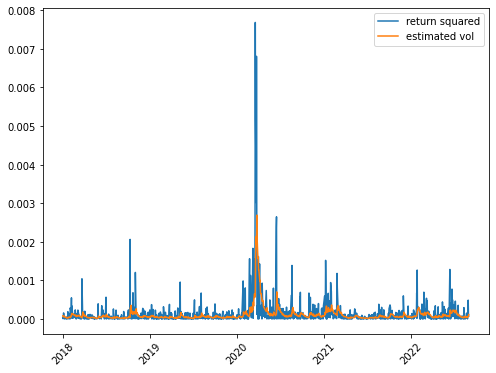

In [ ]:
plt.figure(figsize=(8,6))
data_bt2 = data_bt[data_bt['Year'] >= 2018]
plt.plot(data_bt2['Date'], data_bt2['Return2'], label = 'return squared')
plt.plot(data_bt2['Date'], data_bt2['Vol_estimated'], label = 'estimated vol')
plt.legend()
plt.xticks(rotation = '45')